Using basic k nearest neighbor regressor to predict car prices.  First, evaluates each feature for error and then picks the best performing columns and evaluates different values for k.

In [2]:
import pandas as pd
import numpy as np

In [3]:
col_names=[
            'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
            'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
            'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
          ]
cars = pd.read_csv('imports-85.data', header=None, names=col_names, na_values='?')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-

In [4]:
cars.drop(columns=['normalized-losses'], inplace=True)

In [5]:
knn_feature_columns = [
    'wheel-base', 'length', 'width', 'height', 
    'curb-weight', 'engine-size', 'bore', 'stroke', 
    'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
    'highway-mpg'
]
data_set_features = cars[knn_feature_columns]
data_set_features = (data_set_features - data_set_features.min())/(data_set_features.max()-data_set_features.min())
cleaned_data_set = pd.concat([data_set_features, cars['price']], axis=1)
cleaned_data_set.dropna(inplace=True)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_col_name, targ_col_name, df, k=5):
    instances = df.shape[0]
    test_rows = instances // 3
    test_set = df.iloc[:test_rows]
    train_set = df.iloc[test_rows:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[[train_col_name]], train_set[targ_col_name])
    predictions = knn.predict(test_set[[train_col_name]])
    return np.sqrt(mean_squared_error(test_set[targ_col_name], predictions))
    

In [14]:
k_performance_ind_columns = []
for col_name in knn_feature_columns:
    total_rmse = 0
    for k in range(1, 10, 2):
        rmse = knn_train_test(col_name, 'price', cleaned_data_set, k=k)
        k_performance_ind_columns.append((k, rmse))
        total_rmse += rmse
    print(col_name, rmse)

wheel-base 7471.255655973973
length 6936.281648636522
width 5726.745723727876
height 10397.651060580358
curb-weight 5947.502477482302
engine-size 4630.119777114557
bore 9669.839477695918
stroke 10264.506559886291
compression-rate 8594.296994155002
horsepower 7084.201931124611
peak-rpm 9961.01386823605
city-mpg 5618.794045870923
highway-mpg 6044.569603734989


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

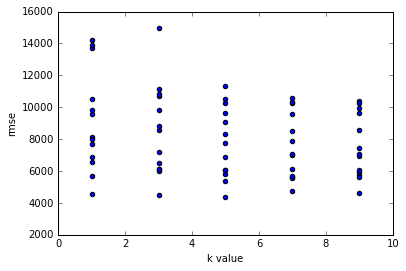

In [9]:
unzipped = [list(t) for t in zip(*k_performance_ind_columns)]
plt.scatter(unzipped[0], unzipped[1])
plt.xlabel('k value')
plt.ylabel('rmse')

In [15]:
#rewrite to accept list of columns to train on
def knn_train_test(train_col_names, targ_col_name, df, k=5):
    instances = df.shape[0]
    test_rows = instances // 3
    test_set = df.iloc[:test_rows]
    train_set = df.iloc[test_rows:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_set[train_col_names], train_set[targ_col_name])
    predictions = knn.predict(test_set[train_col_names])
    return np.sqrt(mean_squared_error(test_set[targ_col_name], predictions))


In [17]:
best_two_rmse = knn_train_test(['engine-size', 'city-mpg'], 'price', cleaned_data_set)
best_three_rmse = knn_train_test(['engine-size', 'city-mpg', 'width'], 'price', cleaned_data_set)
best_four_rmse = knn_train_test(['engine-size', 'city-mpg', 'width', 'curb-weight'], 'price', cleaned_data_set)
best_five_rmse = knn_train_test(['engine-size', 'city-mpg', 'width', 'curb-weight', 'highway-mpg'], 'price', cleaned_data_set)

In [18]:
print(best_two_rmse, best_three_rmse, best_four_rmse, best_five_rmse)

4378.002396878846 5584.296373168657 5536.444331156957 5544.8072624060405


In [19]:
print('two features...')
for k in range(1, 26):
    best_two_rmse = knn_train_test(['engine-size', 'city-mpg'], 'price', cleaned_data_set, k=k)
    print(k, best_two_rmse)

two features...
1 4575.61335274804
2 4409.180545704086
3 4515.4613486833205
4 4352.505076213184
5 4378.002396878846
6 4528.890569132741
7 4626.033606596082
8 4875.838338567652
9 5055.55543818916
10 5278.415953426237
11 5411.106608910443
12 5580.686268809247
13 5678.032306066079
14 5747.546612303075
15 5804.3493365390395
16 5897.409394913494
17 6009.252736054726
18 5998.643091189047
19 5970.668337817223
20 5954.8091509300275
21 6002.337671972442
22 6073.490285170131
23 6119.6003184745705
24 6204.678593172896
25 6265.175927200227


In [20]:
print('four features...')
for k in range(1, 26):
    best_four_rmse = knn_train_test(['engine-size', 'city-mpg', 'width', 'curb-weight'], 'price', cleaned_data_set, k=k)
    print(k, best_four_rmse)

four features...
1 5182.787889513935
2 5727.843848255642
3 5573.759711944508
4 5414.553144606601
5 5536.444331156957
6 5581.29590211884
7 5722.0469402839735
8 5710.369534005995
9 5787.140590929452
10 5940.841926476803
11 6010.237572324306
12 5935.297238414714
13 5968.363278620056
14 6044.127254825751
15 6066.613028373757
16 6171.890425535737
17 6214.0307246118455
18 6277.758120221096
19 6295.949565721969
20 6376.13102483063
21 6366.838800446176
22 6398.456502555795
23 6427.839245335838
24 6467.748025923935
25 6512.214327652308


In [21]:
print('five features...')
for k in range(1, 26):
    best_five_rmse = knn_train_test(['engine-size', 'city-mpg', 'width', 'curb-weight', 'highway-mpg'], 'price', cleaned_data_set, k=k)
    print(k, best_five_rmse)

five features...
1 5470.379311837947
2 5813.978291417756
3 5640.271609208286
4 5466.196408469196
5 5544.8072624060405
6 5549.943633231898
7 5630.542778389829
8 5616.977102815864
9 5760.794199296453
10 5857.908487046839
11 5985.297489346891
12 5962.231873820478
13 6094.145247519189
14 6141.317075179916
15 6212.595735618263
16 6224.006565984121
17 6279.715940796905
18 6327.419782358701
19 6374.953460131028
20 6392.106330975729
21 6405.0893046185965
22 6472.658584585354
23 6510.668663554466
24 6549.5980910511
25 6538.631550229875
